In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [17]:
# Load the dataset
data = pd.read_csv('C://Users//LENOVO//Desktop//ProfCess//cars//train1.csv')
test_data = pd.read_csv('C://Users//LENOVO//Desktop//ProfCess//cars//test.csv')

# Split features and target
X = data.drop("price", axis=1)  # Replace 'price' with your target column
y = data["price"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Preprocessing: Separate numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

# Pipelines for preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [19]:
# Apply preprocessing to train and validation sets
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Optimize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=50,  # Reduce the number of trees
    max_depth=10,     # Limit the depth of each tree
    random_state=42,
    n_jobs=-1         # Utilize all available cores
)

In [20]:
# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

In [21]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Optimized Random Forest Validation RMSE: {rmse}")

Optimized Random Forest Validation RMSE: 71060.65384538236


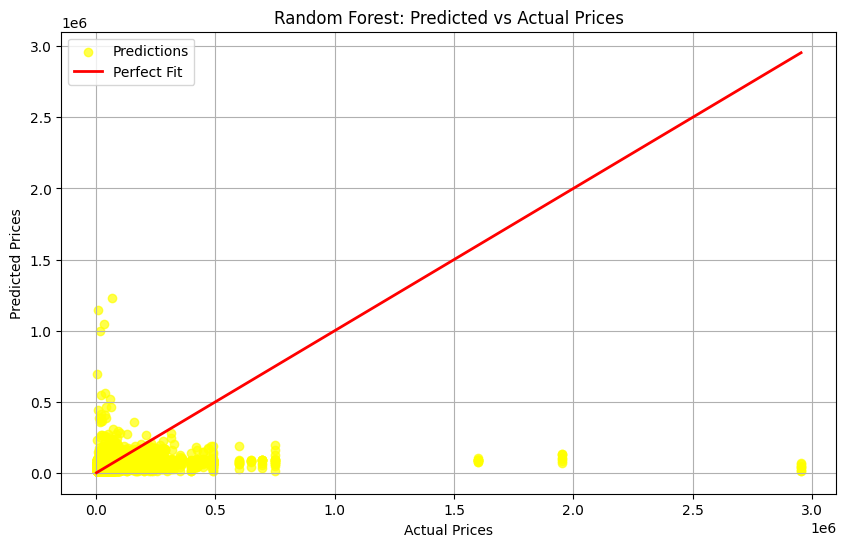

In [24]:
import matplotlib.pyplot as plt

# Scatter plot: Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='yellow', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linewidth=2, label='Perfect Fit')
plt.title('Random Forest: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()
